In [3]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg

## Visualization

In [4]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset_ADNI = pd.read_csv(dataset_path)
dataset_ADNI.head()

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,724.04000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,614.18352,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,536.85000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,690.33000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,681.70000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


In [5]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_P")
dataset_OASIS = pd.read_csv(dataset_path)
dataset_OASIS.head()

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,0,64.585900,0,27.0,0.377501,128.715226,0.422342,115.630163,15.181458,333.805425,...,286.270009,0.289728,206.373786,44.577974,539.225137,3.320292,22924.739100,3.3445,2251,7338.2
1,0,68.076660,2,20.0,0.657212,51.830551,0.557254,84.225204,8.530596,285.070266,...,282.873623,0.310507,206.276556,39.697933,542.232602,2.864138,18182.687670,2.9605,2924,5438.6
2,1,76.221760,1,28.0,0.520032,86.558742,0.594543,123.662642,13.400504,408.091827,...,244.274039,0.370189,201.216707,46.081559,560.592790,3.415186,28045.350990,3.3145,4042,8434.4
3,0,73.221085,0,30.0,0.396133,60.731686,0.596733,122.546512,15.571183,429.454361,...,226.713342,0.517430,232.983710,30.461877,705.221498,2.937422,1196.160472,3.1505,3485,7476.2
4,0,45.872690,0,30.0,0.404800,108.808540,0.520363,98.065558,13.483247,283.453692,...,202.074647,0.354851,169.528802,50.680275,476.040561,3.017047,47743.254120,3.5420,3964,8021.8


In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale dataset_ADNI
scaler_one = StandardScaler()
dataset_ADNI_scaled_array = scaler_one.fit_transform(dataset_ADNI)  # fit_transform returns a NumPy array
dataset_ADNI_scaled = pd.DataFrame(dataset_ADNI_scaled_array, 
                                   columns=dataset_ADNI.columns, 
                                   index=dataset_ADNI.index)  # use original df for columns and index

# Scale dataset
scaler_two = StandardScaler()
dataset_scaled_array = scaler_two.fit_transform(dataset_OASIS)  # fit_transform returns a NumPy array
dataset_OASIS_scaled = pd.DataFrame(dataset_scaled_array, 
                              columns=dataset_OASIS.columns,  # use original df for columns
                              index=dataset_OASIS.index)      # use original df for index


# Checking the scaled datasets for ADNI and OASIS

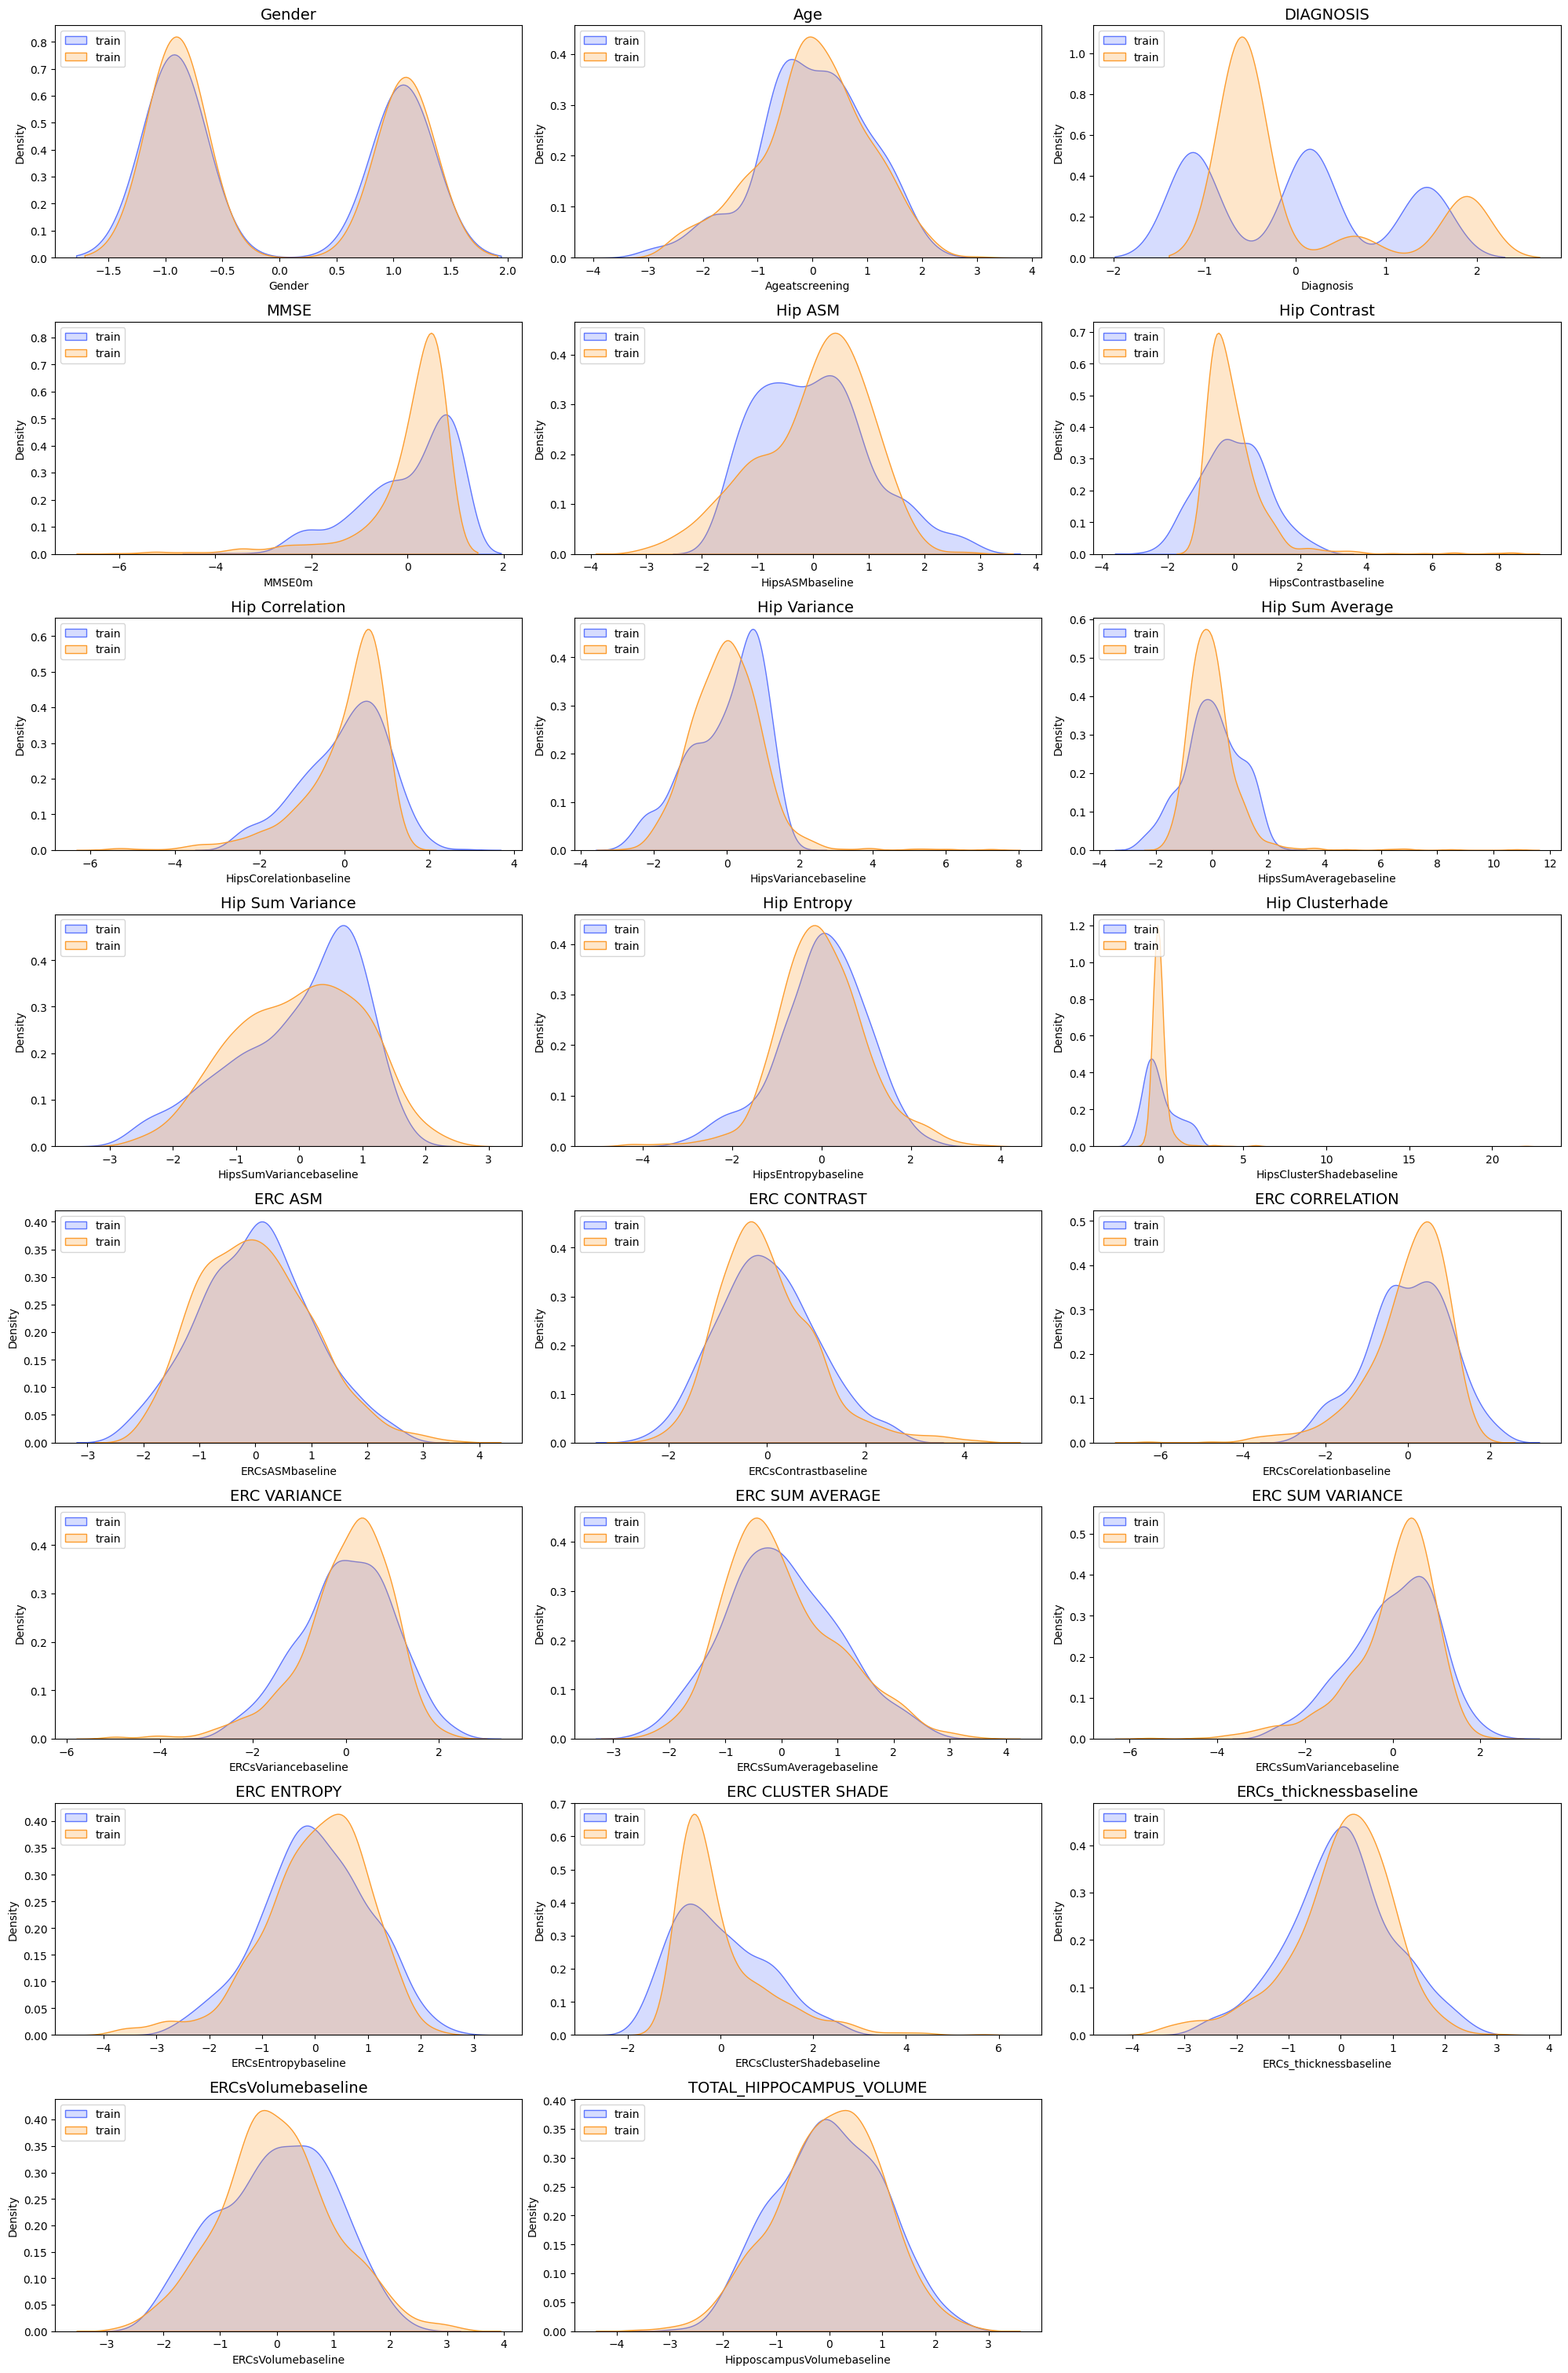

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each column in the training set using KDE plots
plt.figure(figsize=(20, 45))

for i in range(len(dataset_ADNI_scaled.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Plot KDE for training data only
    sns.kdeplot(
        dataset_ADNI_scaled[dataset_ADNI_scaled.columns[i]],
        color="#5e76fe",
        fill=True,
        label="train"
    )
    
    sns.kdeplot(
        dataset_OASIS_scaled[dataset_OASIS_scaled.columns[i]],
        color="#fc9c2e",
        fill=True,
        label="train"
    )
    
    plt.legend(loc="upper left")
    plt.title(dataset_OASIS_scaled.columns[i], fontsize=14)

plt.tight_layout()
plt.show()


# Merging

In [8]:
rename_dict = {
    'Ageatscreening': 'Age',
    'Diagnosis': 'DIAGNOSIS',
    'MMSE0m': 'MMSE',
    'HipsASMbaseline': 'Hip ASM',
    'HipsContrastbaseline': 'Hip Contrast',
    'HipsCorelationbaseline': 'Hip Correlation',
    'HipsVariancebaseline': 'Hip Variance ',
    'HipsSumAveragebaseline': 'Hip Sum Average',
    'HipsSumVariancebaseline': 'Hip Sum Variance',
    'HipsEntropybaseline': 'Hip Entropy',
    'HipsClusterShadebaseline': 'Hip Clusterhade',
    'ERCsASMbaseline': 'ERC ASM',
    'ERCsContrastbaseline': 'ERC CONTRAST',
    'ERCsCorelationbaseline': 'ERC CORRELATION',
    'ERCsVariancebaseline': 'ERC VARIANCE ',
    'ERCsSumAveragebaseline': 'ERC SUM AVERAGE',
    'ERCsSumVariancebaseline': 'ERC SUM VARIANCE',
    'ERCsEntropybaseline': 'ERC ENTROPY',
    'ERCsClusterShadebaseline': 'ERC CLUSTER SHADE',
    'HipposcampusVolumebaseline': 'TOTAL_HIPPOCAMPUS_VOLUME'
}

dataset_ADNI_scaled.rename(columns=rename_dict, inplace=True)

In [10]:
dataset_M = pd.concat([dataset_OASIS_scaled, dataset_ADNI_scaled], axis=0, ignore_index=True)

# then shuffle rows in-place (or assign back to combined)
dataset_M = dataset_M.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
dataset_M

,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,Hip Sum Variance,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,-0.904157,2.052797,1.884844,-0.815047,1.732432,-0.756411,0.661236,-1.387881,-1.206880,-0.756683,...,3.654016,-3.252804,-0.647188,-0.029023,-2.530309,-2.460142,0.150013,-1.567981,-1.444179,-1.450960
1,1.083639,1.129258,0.157233,0.733409,-0.227358,0.570604,0.431766,0.897742,0.491501,0.901404,...,1.756506,-1.761607,0.534597,-0.768174,-0.497584,-0.901802,-1.304675,-0.345029,-1.264466,-0.636020
2,-0.922816,1.783272,-1.130115,1.083965,-0.095235,NaN,NaN,-1.934125,2.155569,NaN,...,0.282691,-0.758427,-0.719217,2.267059,-0.877068,1.685231,NaN,-0.108415,0.535156,0.229387
3,-0.922816,1.453142,-1.130115,0.733409,2.788075,NaN,-0.726067,1.472520,-1.896840,1.040657,...,0.471923,0.245265,1.485150,-0.302601,1.298400,-0.067433,-1.011857,0.499632,1.164643,0.410779
4,1.083639,-0.587170,1.444582,-1.720484,0.887114,0.335939,0.232303,0.254438,-1.461009,0.222155,...,1.976959,-2.038729,0.143700,0.315421,-1.042610,0.433333,-0.014275,-1.154608,-1.132477,-0.489907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.083639,0.012309,-1.130115,1.083965,-0.340822,0.773272,0.232303,0.660236,0.490116,0.583615,...,-1.214842,1.482102,0.177103,-0.695798,0.995917,-0.865806,-0.333328,0.332027,0.575768,1.457087
1247,1.083639,-0.239140,0.157233,0.733409,-0.837320,-0.397462,-0.565015,-0.839523,0.426996,-0.855708,...,NaN,-2.725276,0.340045,1.313348,-1.370533,0.937317,1.264859,1.581611,-0.728894,-0.012174
1248,1.083639,-1.291130,0.157233,-0.318259,-0.340822,-0.885410,0.831746,-0.134500,0.227764,0.061494,...,0.994334,-0.865119,0.388151,0.026062,-0.171571,-0.369771,-0.067300,-0.847392,-1.878723,-1.012914
1249,-0.922816,0.521452,0.157233,0.032297,-1.077584,0.803167,-1.566025,-0.535985,1.030368,-0.787765,...,NaN,NaN,-1.796725,-0.746590,NaN,-0.700461,-0.298001,-1.743389,-2.235348,-1.664101


# Merging results and visualization

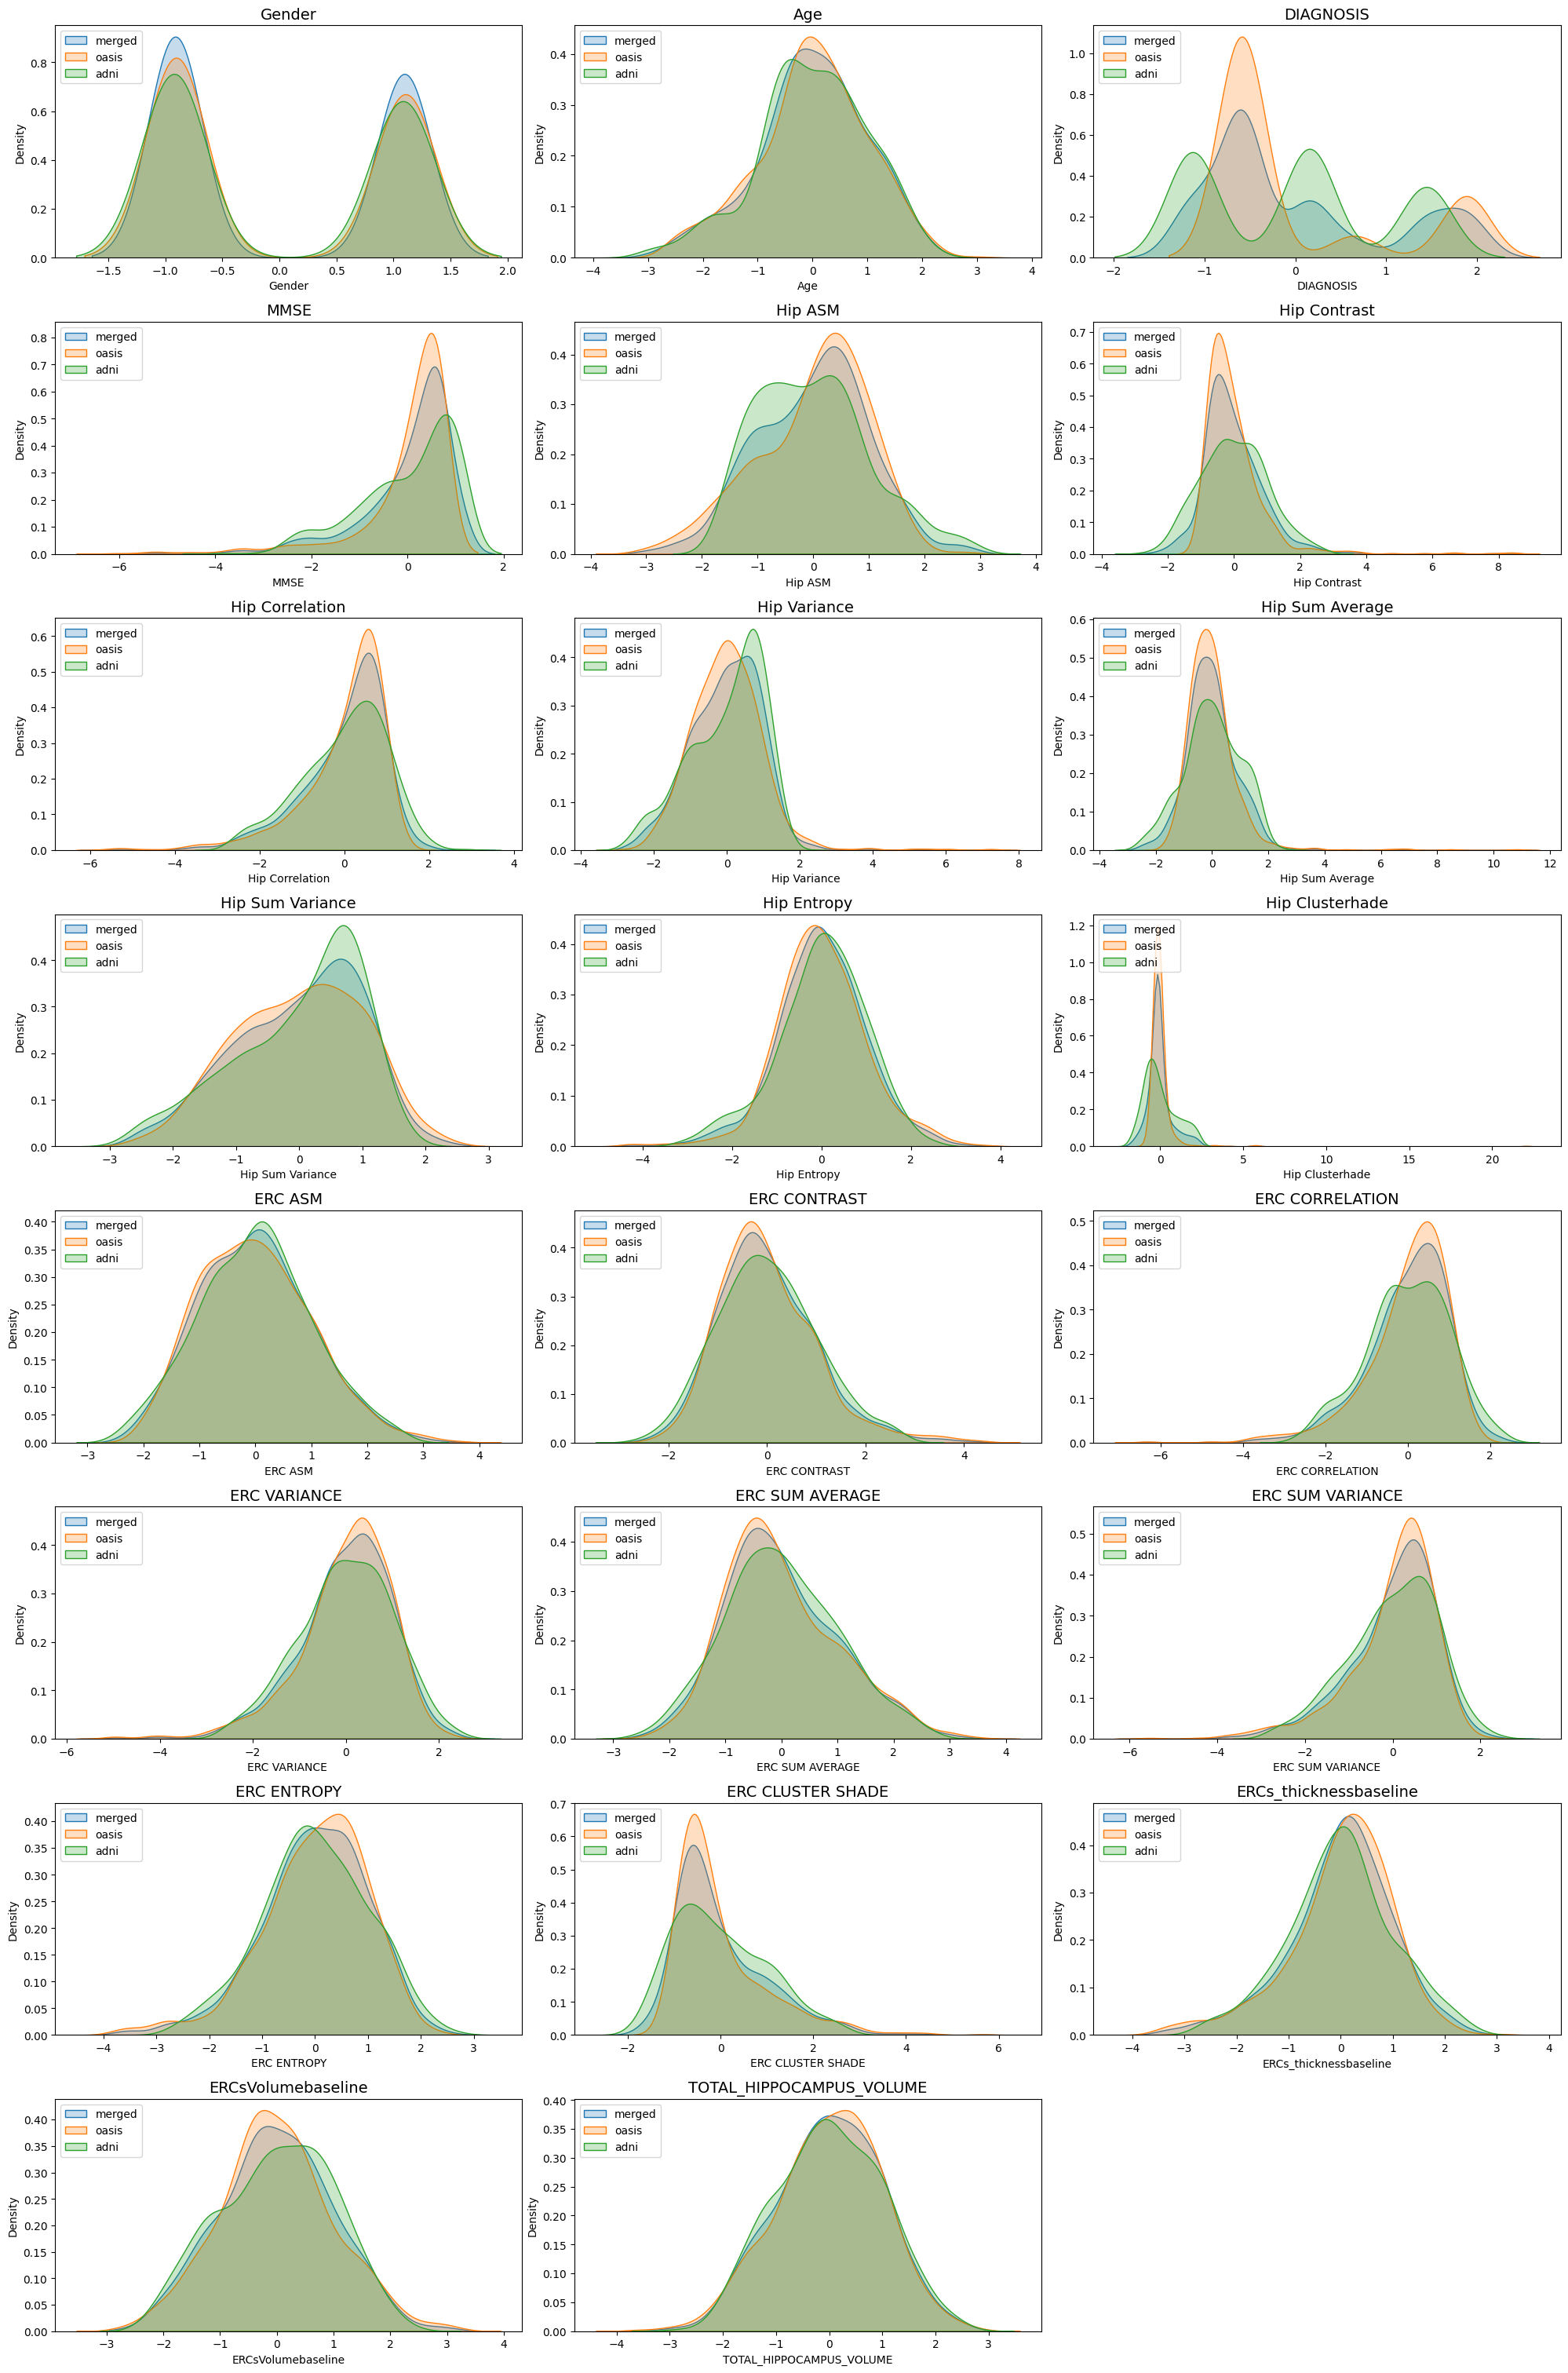

In [12]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(dataset_M.columns)):
    plt.subplot(12, 3, i+1)
    
    sns.kdeplot(
        dataset_M[dataset_M.columns[i]], 
        fill=True,
        label="merged")
    plt.legend(loc="upper left")
    
    sns.kdeplot(
        dataset_OASIS_scaled[dataset_OASIS_scaled.columns[i]],
        fill=True,
        label="oasis"
    )
    plt.legend(loc="upper left")
    
    sns.kdeplot(
        dataset_ADNI_scaled[dataset_ADNI_scaled.columns[i]],
        fill=True,
        label="adni"
    )
    plt.legend(loc="upper left")
    
    plt.legend(loc="upper left")
    plt.title(dataset_ADNI_scaled.columns[i], fontsize=14)
    
plt.tight_layout()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_6472\3022902062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=dataset_M.columns[i], data=df_melted, palette="pastel")
C:\Users\steve\AppData\Local\Temp\ipykernel_6472\3022902062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=dataset_M.columns[i], data=df_melted, palette="pastel")
C:\Users\steve\AppData\Local\Temp\ipykernel_6472\3022902062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y=dataset_M.columns[i], data=df_melted, palette="past

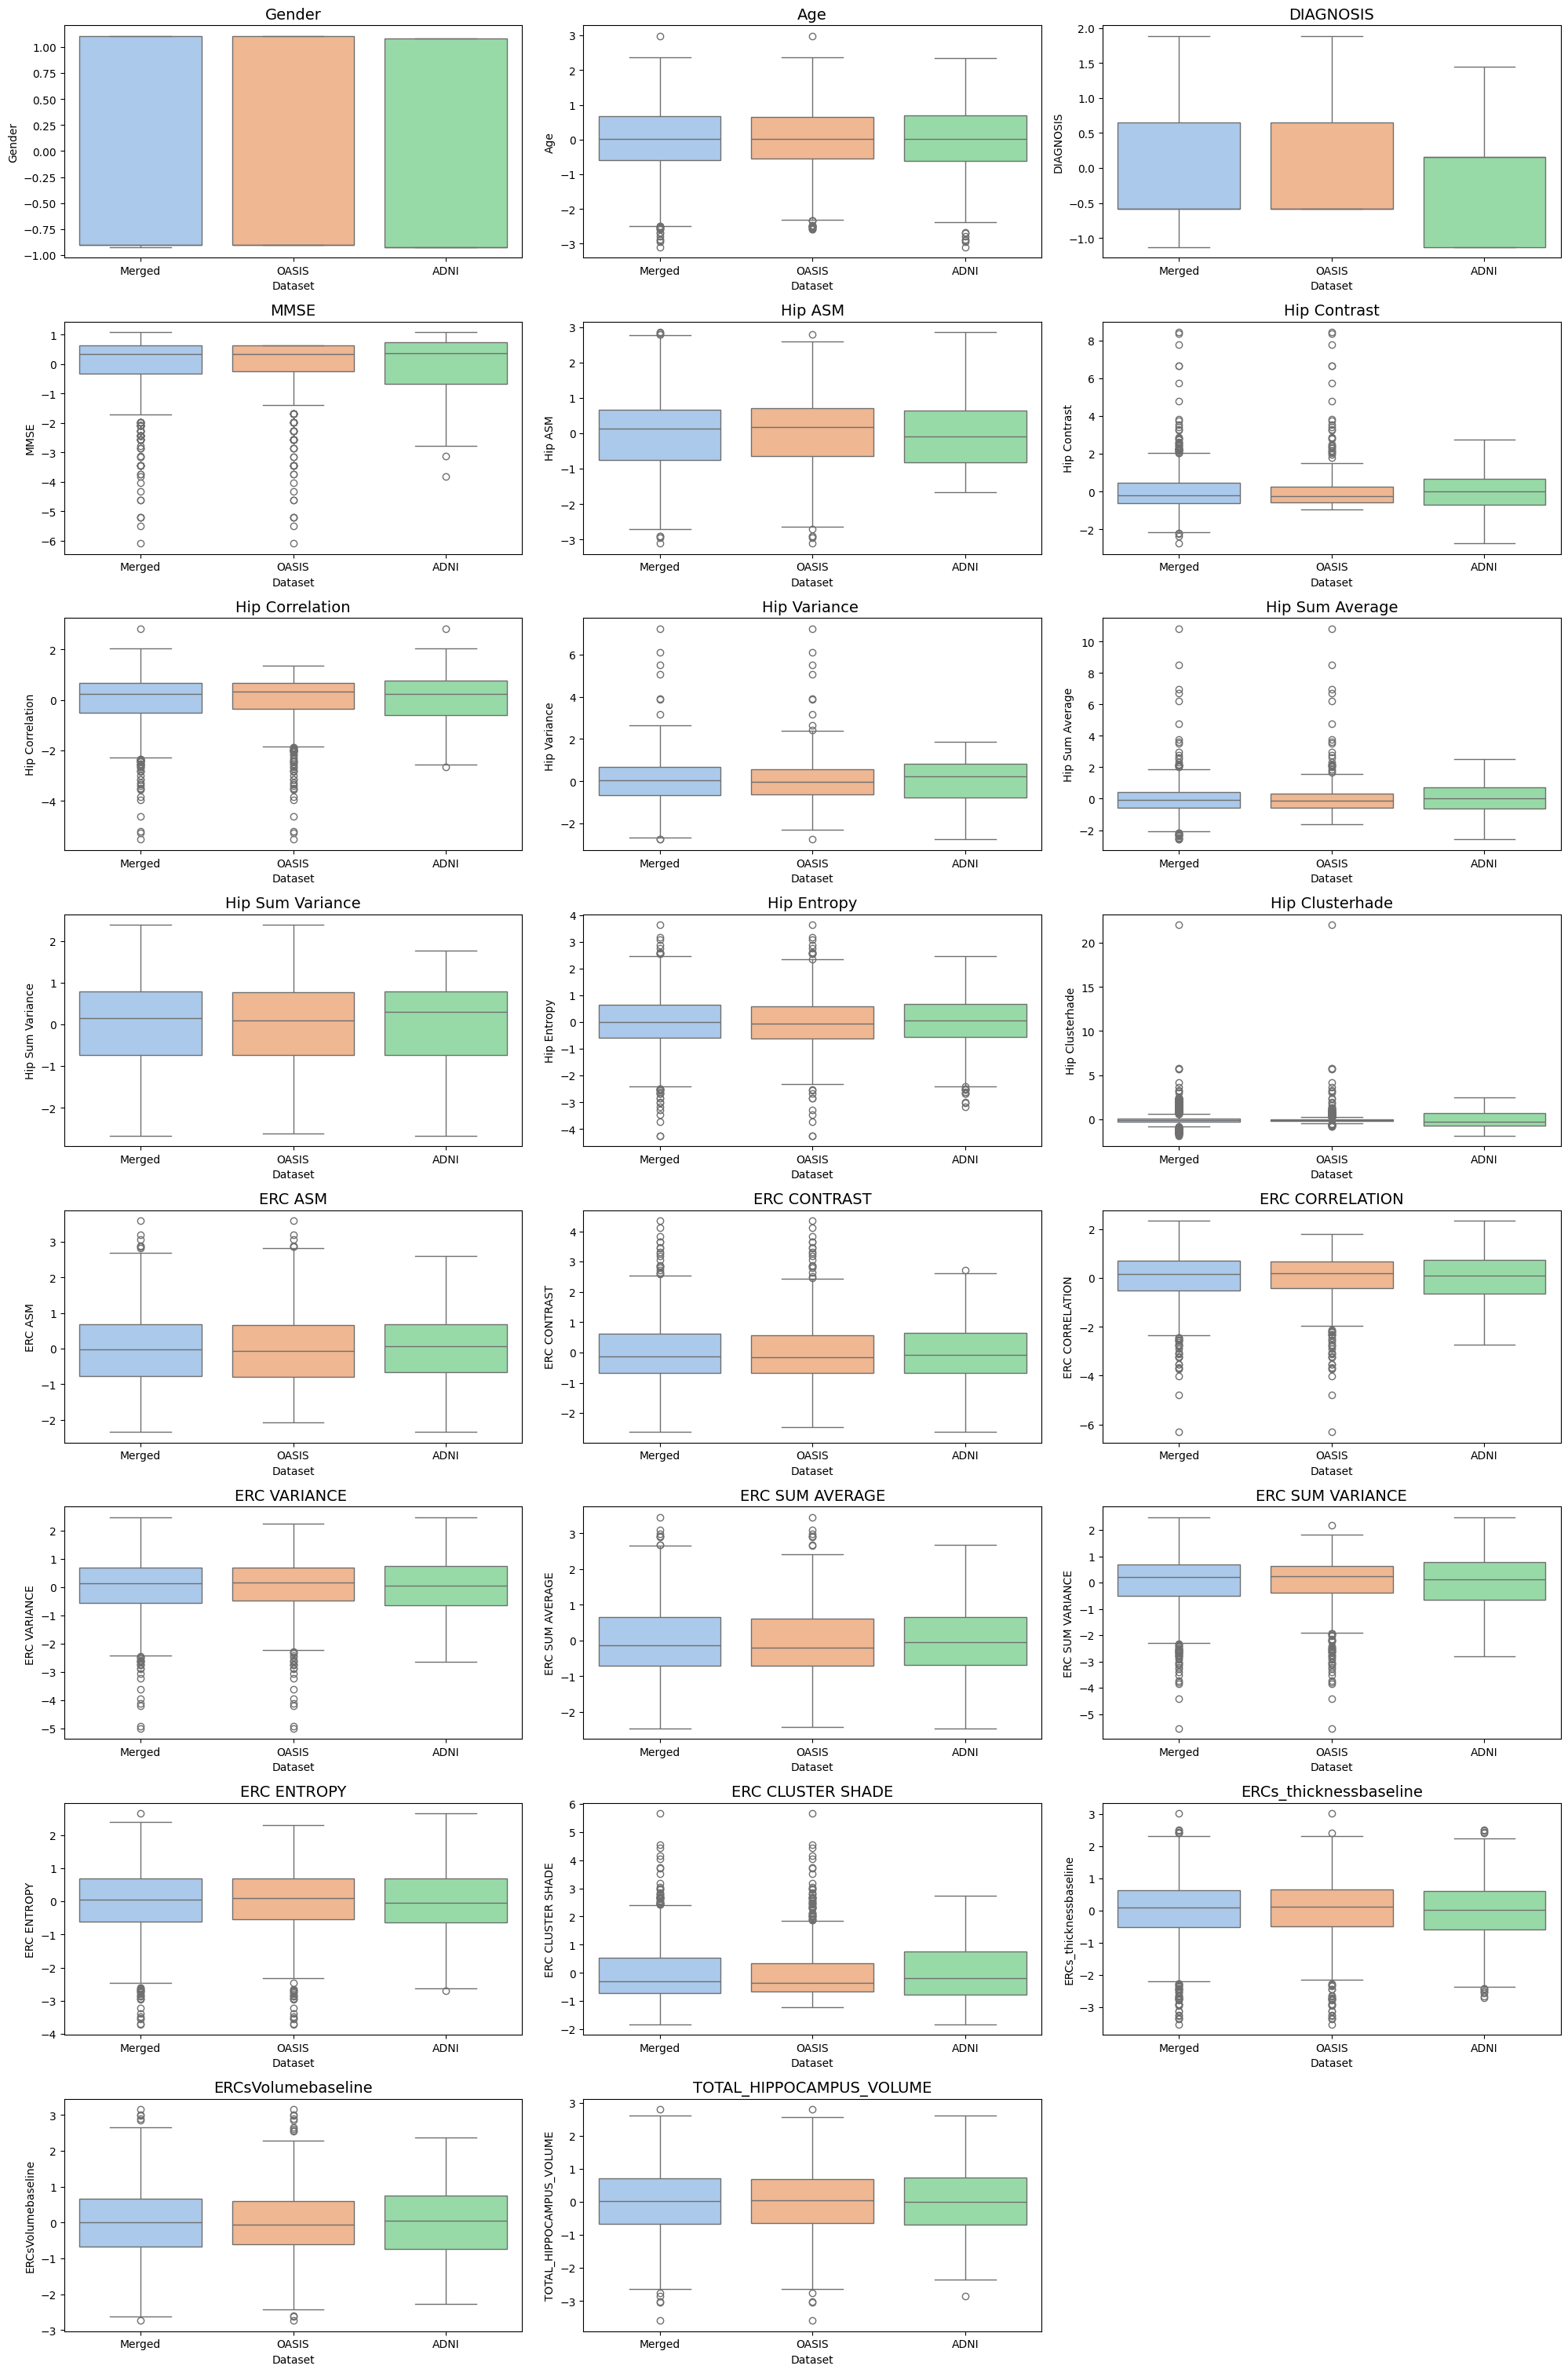

In [33]:
plt.figure(figsize=(20, 45))

for i in range(len(dataset_M.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Prepare data for boxplot
    df_plot = pd.DataFrame({
        "Merged": dataset_M[dataset_M.columns[i]],
        "OASIS": dataset_OASIS_scaled[dataset_OASIS_scaled.columns[i]],
        "ADNI": dataset_ADNI_scaled[dataset_ADNI_scaled.columns[i]]
    })
    
    # Melt data for seaborn boxplot
    df_melted = df_plot.melt(var_name="Dataset", value_name=dataset_M.columns[i])
    
    # Plot boxplot
    sns.boxplot(x="Dataset", y=dataset_M.columns[i], data=df_melted, palette="pastel")
    
    plt.title(dataset_ADNI_scaled.columns[i], fontsize=14)

plt.tight_layout()
plt.show()


# Train test split analysis

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset_M.drop("DIAGNOSIS", axis=1),  
    dataset_M["DIAGNOSIS"],  
    test_size=0.3,  
    random_state=42,  
)

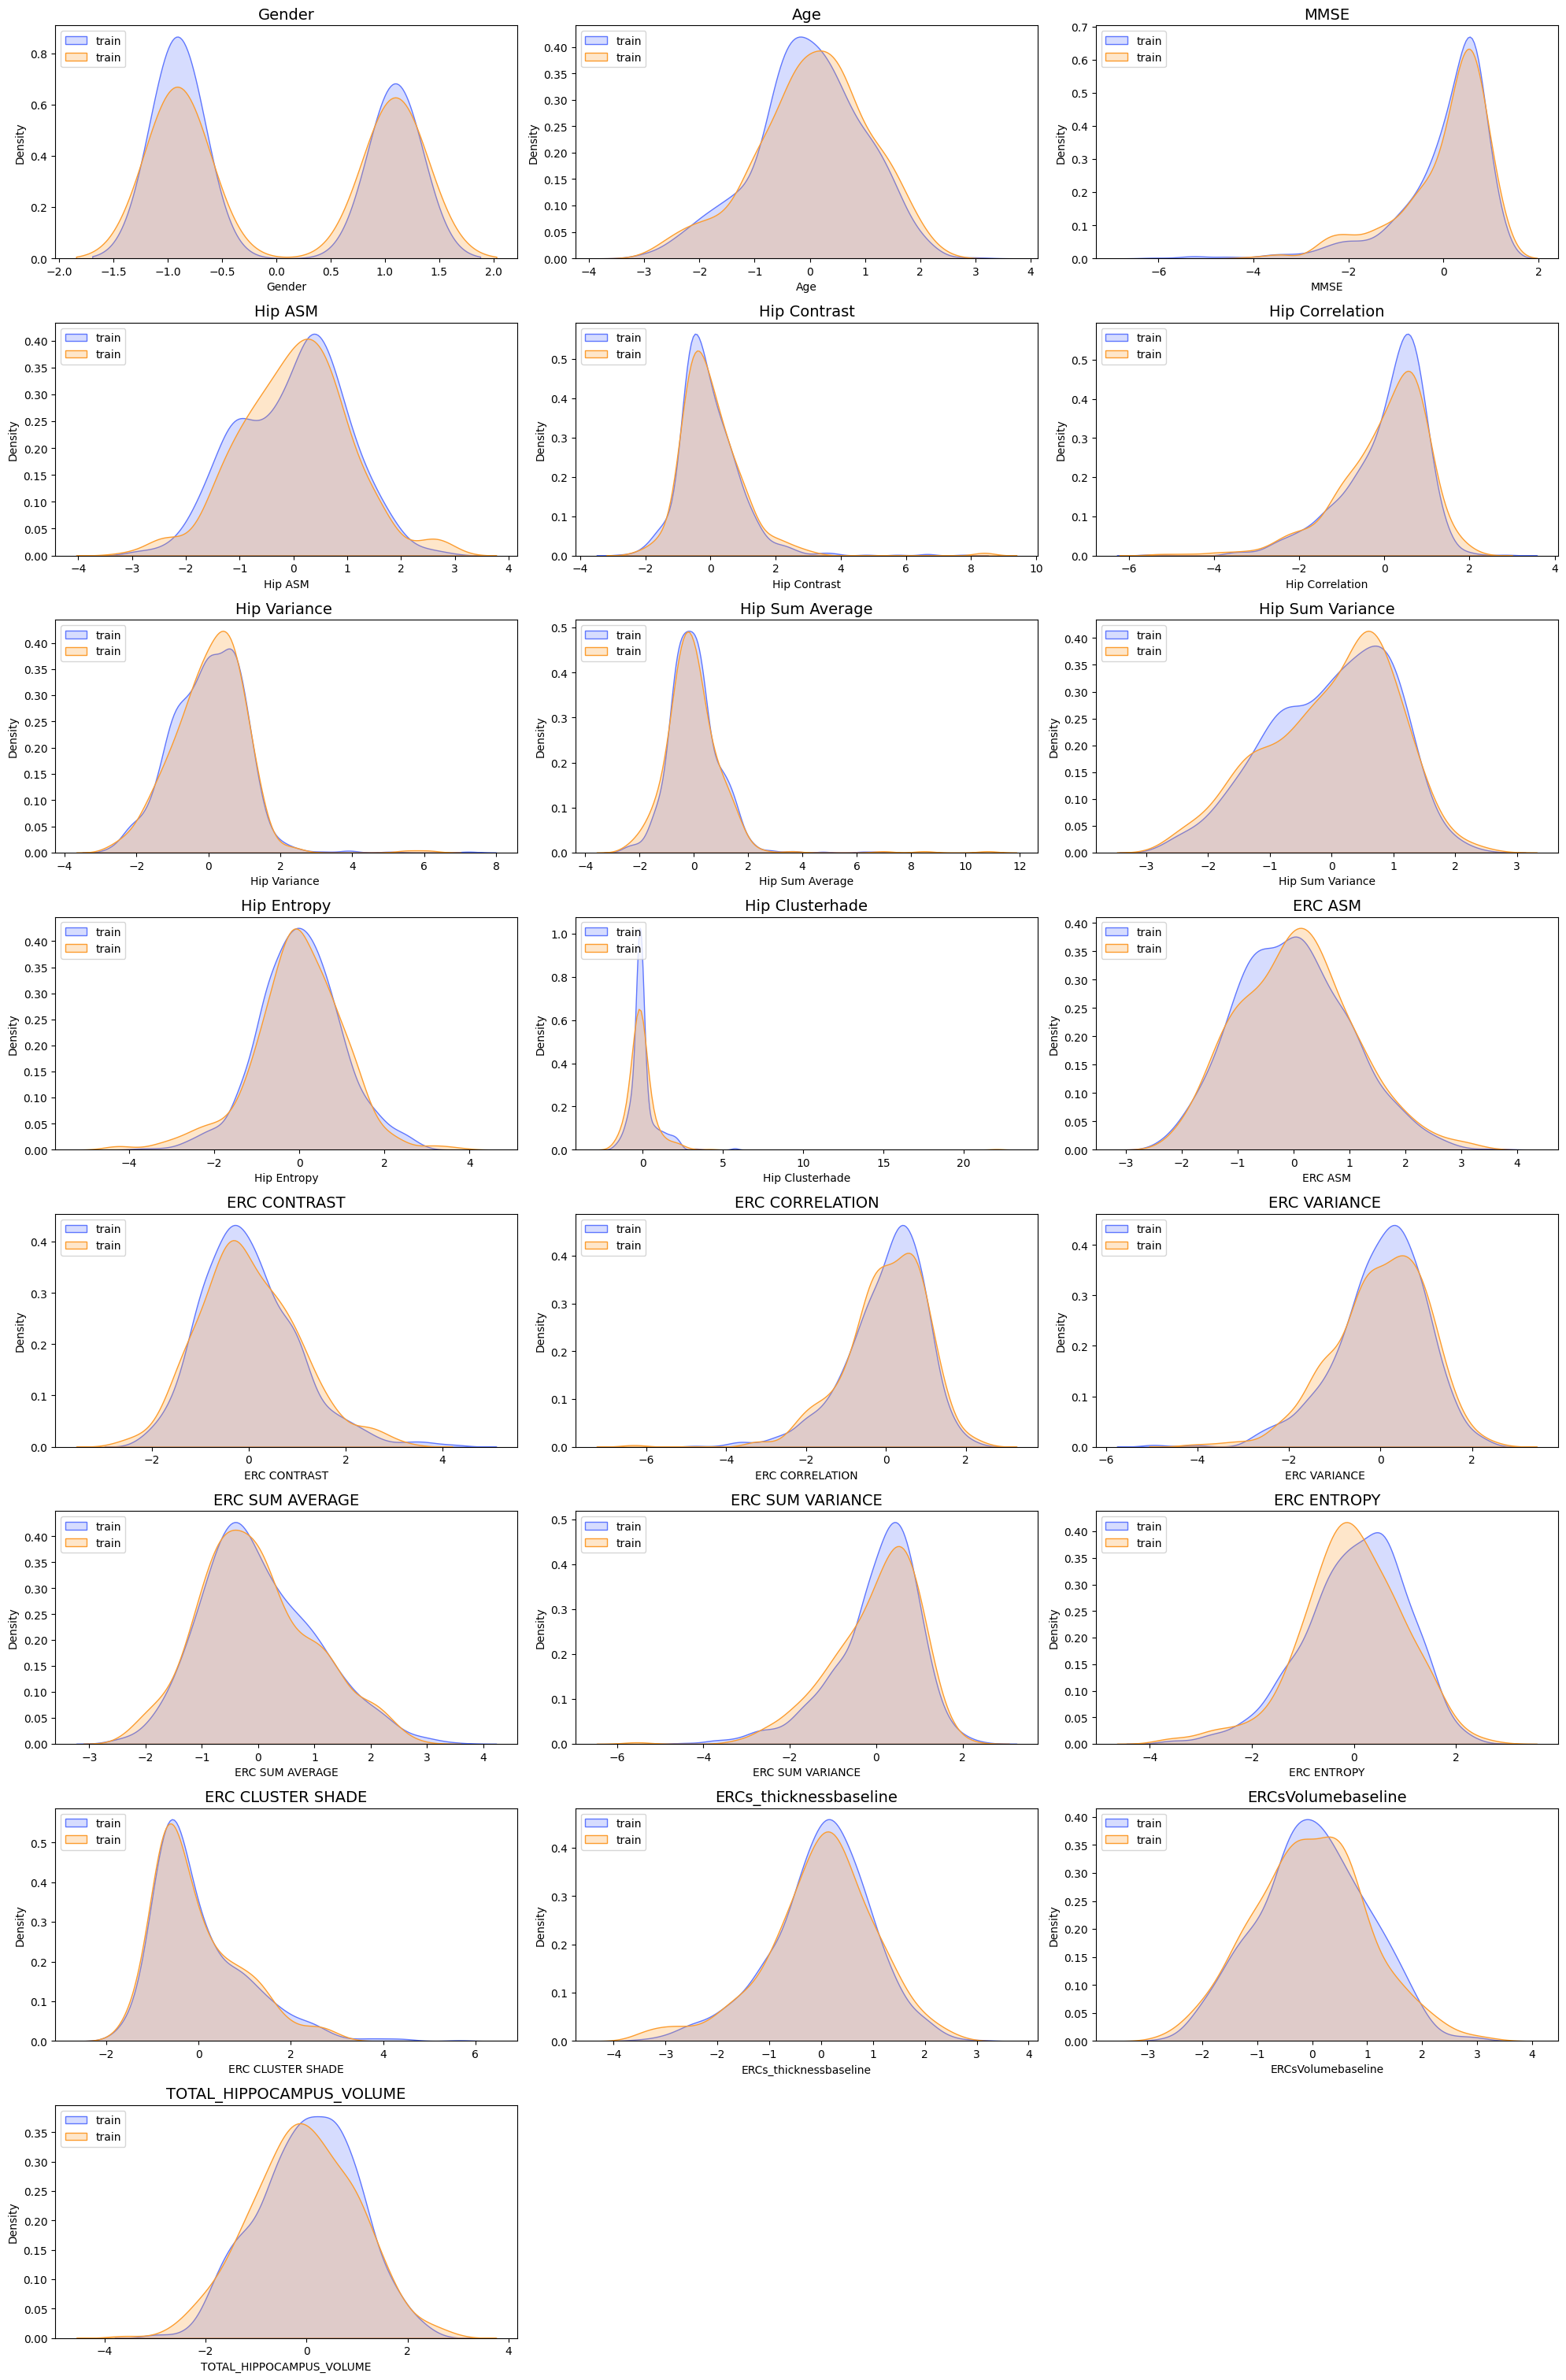

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each column in the training set using KDE plots
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12, 3, i + 1)
    
    # Plot KDE for training data only
    sns.kdeplot(
        X_train[X_train.columns[i]],
        color="#5e76fe",
        fill=True,
        label="train"
    )
    
    sns.kdeplot(
        X_test[X_test.columns[i]],
        color="#fc9c2e",
        fill=True,
        label="train"
    )
    
    plt.legend(loc="upper left")
    plt.title(X_test.columns[i], fontsize=14)

plt.tight_layout()
plt.show()
